In [1]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [3]:
df=pd.read_csv("./pima-indians-diabetes3.csv")

In [5]:
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
X_data=df.drop(["diabetes"],axis=1)
Y_data=df["diabetes"]

In [9]:
X_data.isnull().sum()

pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
bmi          0
pedigree     0
age          0
dtype: int64

In [13]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X_data)
X_scaler=pd.DataFrame(X_scaler,columns=X_data.columns)

In [14]:
X_scaler

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


<AxesSubplot:title={'center':'StandrdScaler'}, ylabel='Density'>

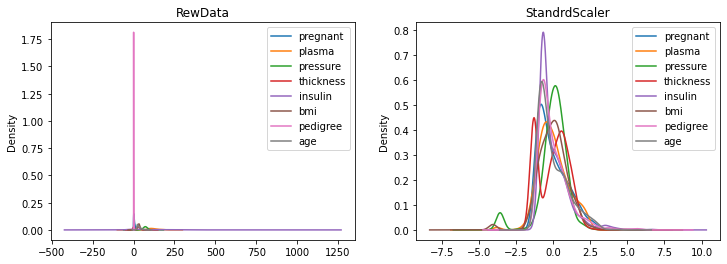

In [17]:
fig,ax= plt.subplots(1,2,figsize=(12,4))
X_data.plot(kind="kde",title="RewData",ax=ax[0])
X_scaler.plot(kind="kde",title="StandrdScaler",ax=ax[1])

In [19]:
X_train,X_test,Y_trian,Y_test=train_test_split(X_scaler,Y_data,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)


# Decsison Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_trian)
Y_pred=dt.predict(X_test)

In [28]:
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(dt,X_train,Y_trian,cv=skf)

In [44]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 71.50 %
Standard Deviation : 6.95 %


# Ramdom Forest

In [58]:
from sklearn.ensemble  import RandomForestClassifier
rt=RandomForestClassifier()
rt.fit(X_train,Y_trian)
Y_pred=dt.predict(X_test)

In [66]:
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(rt,X_train,Y_trian,cv=skf)

In [43]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 71.50 %
Standard Deviation : 6.95 %


# 가우시안 나이브베이즈

In [36]:
from sklearn.naive_bayes  import GaussianNB
gn=RandomForestRegressor()
gn.fit(X_train,Y_trian)
Y_pred=dt.predict(X_test)

In [65]:
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(gn,X_train,Y_trian,cv=skf)

In [42]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 71.50 %
Standard Deviation : 6.95 %


# K-NN

In [64]:
from sklearn.neighbors  import KNeighborsClassifier
kn=RandomForestRegressor()
kn.fit(X_train,Y_trian)
Y_pred=kn.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(dt,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 70.85 %
Standard Deviation : 7.80 %


# AdaBoost

In [63]:
from sklearn.ensemble  import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(X_train,Y_trian)
Y_pred=ab.predict(X_test)
Y_pred=ab.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(ab,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 76.73 %
Standard Deviation : 4.45 %


# 이차판별 분석

In [62]:
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
qd=QuadraticDiscriminantAnalysis()
qd.fit(X_train,Y_trian)
Y_pred=qd.predict(X_test)
Y_pred=qd.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(qd,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.14 %
Standard Deviation : 5.60 %


# SVM

In [61]:
from sklearn.svm  import SVC
sv=SVC()
sv.fit(X_train,Y_trian)
Y_pred=sv.predict(X_test)
Y_pred=sv.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(sv,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.53 %
Standard Deviation : 5.20 %


# SVM-RBF

In [60]:
from sklearn.svm  import SVC
sr=SVC(kernel='rbf')
sr.fit(X_train,Y_trian)
Y_pred=sr.predict(X_test)
Y_pred=sr.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(sr,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100)) #표준편차

Accuracy : 75.52 %
Standard Deviation : 5.39 %


# voting

In [67]:
from sklearn.ensemble  import VotingClassifier
clf1=AdaBoostClassifier()
clf2=RandomForestClassifier()
clf3=sr=SVC(kernel='linear')
vc=VotingClassifier(estimators=[("ad",clf1),("rf",clf2),("cvc",clf3)])
vc.fit(X_train,Y_trian)
Y_pred=vc.predict(X_test)
Y_pred=vc.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(vc,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 77.45 %
Standard Deviation : 5.34 %


# Baggin 

In [68]:
from sklearn.ensemble  import BaggingClassifier
bc=BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=10)
bc.fit(X_train,Y_trian)
Y_pred=bc.predict(X_test)
Y_pred=bc.predict(X_test)
skf=StratifiedKFold(n_splits=10,shuffle=True)
accuracies=cross_val_score(sr,X_train,Y_trian,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100)) #표준편차

Accuracy : 77.76 %
Standard Deviation : 5.31 %


# 여러 알고리즘 성능을 한눈에  비교하기

In [71]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]
# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

Mean accuracy of D_tree : 69.46 %
Mean accuracy of RF : 76.73 %
Mean accuracy of GNB : 75.35 %
Mean accuracy of KNN : 75.01 %
Mean accuracy of Ada : 77.57 %
Mean accuracy of QDA : 76.21 %
Mean accuracy of SVM_l : 73.27 %
Mean accuracy of SVM_k : 75.34 %
Mean accuracy of Voting : 76.73 %
Mean accuracy of Bagging : 77.24 %


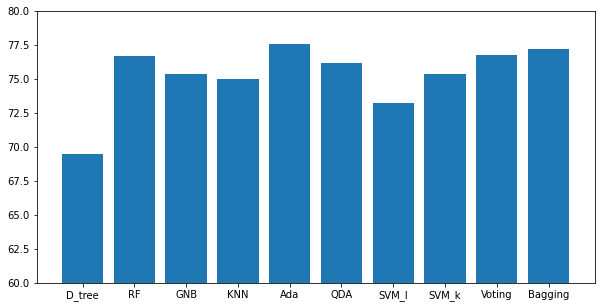

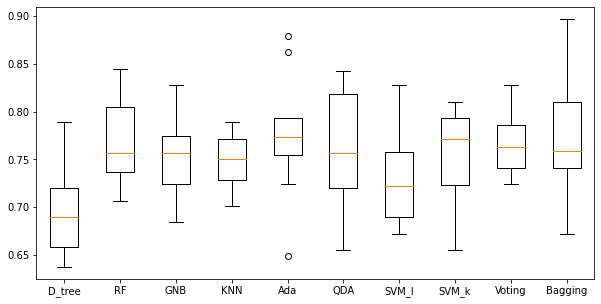

In [74]:
# 각 분류기를 실행하여 결과를 저장합니다.
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다.
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다.
    accuracies=cross_val_score(classifier, X = X_train, y = Y_trian, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);
# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

In [ ]:
number=int(input("정수입력"))
if number%2==0:
    print("짝수입니다.")
if number%2==1:
        print("홀수입니다")

In [ ]:
import ma